## Import libraries and data

In [1]:
# import libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# set working directory

path = "S:/Kaggle Projects/kaggle-titanic"
os.chdir(path)

In [3]:
# read the dataset

data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# check for missing values

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning

In [5]:
# Replace missing values from`Age` with the median Age value

data['Age'] = data['Age'].fillna(data['Age'].median())

In [6]:
# Replace missing values of `Embarked` with the mode value

data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [7]:
 # remove columns
    
data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [8]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

## Exploratory Data Analysis

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [10]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Plot to look at the price distribution

<Figure size 800x400 with 0 Axes>

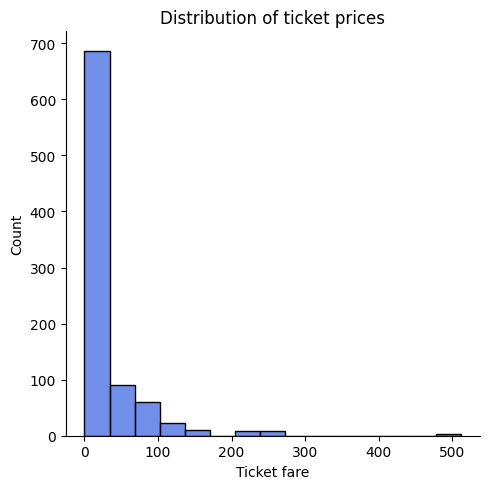

In [21]:
plt.figure(figsize=(8, 4))

sns.displot(data=data, x="Fare", color="royalblue", bins=15)
plt.xlabel("Ticket fare")
plt.ylabel("Count")
plt.title("Distribution of ticket prices")
plt.tight_layout()

plt.show()

### Plot to look at the count of passengers with various embarked status

In [16]:
embarked_counts = data.groupby(['Embarked']).count()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,,,
C,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77
S,646,646,646,646,646,646,646,646


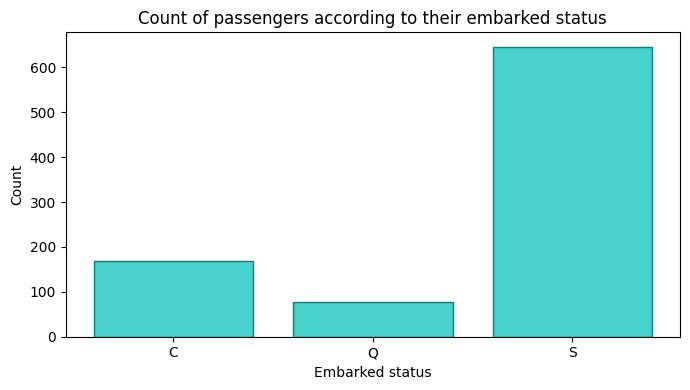

In [19]:
plt.figure(figsize=(7, 4))

plt.bar(embarked_counts.index, embarked_counts.Sex, align='center', edgecolor="teal", color="mediumturquoise")
plt.xlabel("Embarked status")
plt.ylabel("Count")
plt.title("Count of passengers according to their embarked status")
plt.tight_layout()

plt.show()

### Plot to look at the Age distribution of all passengers gender wise

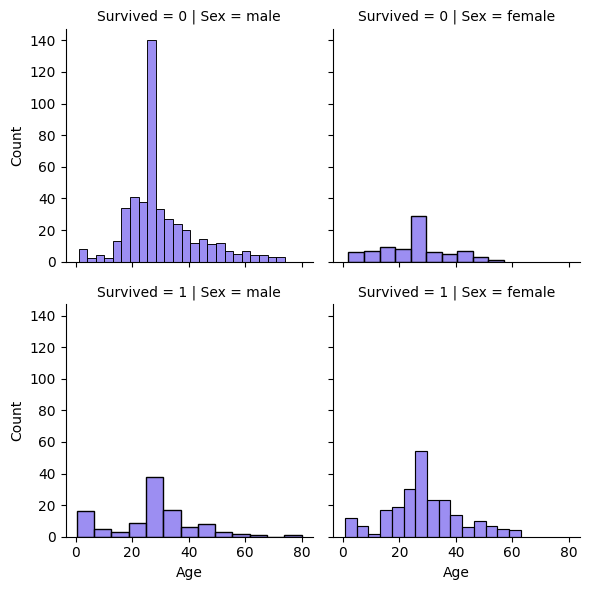

In [27]:
p = sns.FacetGrid(data, row="Survived", col="Sex")
p.map_dataframe(sns.histplot, x="Age", color="mediumslateblue")

## Data Preparation

In [28]:
# Label encoding categorical columns

# import the module
from sklearn.preprocessing import LabelEncoder

# create object for encoder class
encoder = LabelEncoder()

In [29]:
# encode `Sex` column

data['Sex'] = encoder.fit_transform(data['Sex'])

In [30]:
# encode `Embarked` column

data['Embarked'] = encoder.fit_transform(data['Embarked'])

In [31]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


## Train classifier model

In [32]:
# import modules

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [33]:
pipe_svc = make_pipeline(StandardScaler(), 
                         VarianceThreshold(threshold=0),
                         LinearSVC(random_state=98))

pipe_lr = make_pipeline(StandardScaler(), 
                        VarianceThreshold(threshold=0),
                        LogisticRegression(random_state=89))

In [34]:
# define parameters to tune

params_svc = {
    'linearsvc__C': [0.1, 0.5, 1, 10],
    'linearsvc__loss': ['hinge', 'squared_hinge']
}

params_lr = {
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__C': [0.1, 0.5, 1, 10],
    'logisticregression__solver': ['liblinear', 'saga']
}
    

In [35]:
# split data into train and test data

X = data.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8]]
y = data.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712,) (179,)


In [36]:
# apply gridSearchCV to data

svc_grid_cv = GridSearchCV(estimator=pipe_svc,
                         param_grid=params_svc,
                         scoring='accuracy',
                         cv=10)

lr_grid_cv = GridSearchCV(estimator=pipe_lr,
                         param_grid=params_lr,
                         scoring='accuracy',
                         cv=10)

# combine the 2 grid cv into a list
grid_cv = [svc_grid_cv, lr_grid_cv]

In [37]:
for model in grid_cv:
    model.fit(X_train, y_train)

In [38]:
model_dict = {0: 'SVC', 1: 'Logistic regression'}

for i, model in enumerate(grid_cv):
    print(f"{model_dict[i]} Accuracy: {model.score(X_test, y_test)}")
    print(f"{model_dict[i]} Optimal parameters: \n {model.best_params_}")

SVC Accuracy: 0.8324022346368715
SVC Optimal parameters: 
 {'linearsvc__C': 0.1, 'linearsvc__loss': 'squared_hinge'}
Logistic regression Accuracy: 0.8324022346368715
Logistic regression Optimal parameters: 
 {'logisticregression__C': 0.5, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}


In [39]:
svm_clf = LinearSVC(C=0.5, loss="hinge", random_state=90)
svm_clf.fit(X_train, y_train)

LinearSVC(C=0.5, loss='hinge', random_state=90)

In [40]:
y_pred = svm_clf.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8435754189944135
[[101   9]
 [ 19  50]]


## Test data

### Data Cleaning

In [42]:
# import the test data

test_data = pd.read_csv("test.csv")

In [43]:
# check for missing values

test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [44]:
# replace missing values of Age and Fare with median

test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [45]:
# remove columns 

test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [46]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [47]:
# encode the text columns: `Sex` and `Embarked`

test_data['Sex'] = encoder.fit_transform(test_data['Sex'])

test_data['Embarked'] = encoder.fit_transform(test_data['Embarked'])

In [48]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


## Test the model

In [49]:
y_pred = svm_clf.predict(test_data)

In [50]:
prediction_data = {'PassengerId': test_data['PassengerId'],
                  'Survived': y_pred}

In [51]:
final_df = pd.DataFrame(prediction_data)

In [52]:
final_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
